# Práctica Guiada: Demostración de `GridSearchCV`

Vamos a usar el dataset iris... ya largamente conocido.

Veremos cómo usar `GridSearchCV` para tunear el hiperparámetro `k` del algoritmo de vecinos más cercanos.

**Nota de color:** (acá)[http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf] hay un link al paper de Ronald Fisher que usa este dataset en 1936.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = load_iris()
X = df.data
y = df.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=98)
len(X_train), len(X_test), len(y_train), len(y_test)

(120, 30, 120, 30)

## 1. Escribiendo los parámetros a "mano"

Está claro que, dependiendo del modelo, los hiperparámetros pueden tener un efecto importante en la calidad de la predicción. 
Veamos cómo varía el accuracy a la hora de predecir la especie de las flores para distintos valores de K.

In [4]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
k_scores

[0.9631868131868131,
 0.96263736263736255,
 0.97747252747252733,
 0.97747252747252733,
 0.9780219780219781,
 0.9780219780219781,
 0.9780219780219781,
 0.98516483516483522,
 0.98516483516483522,
 0.98516483516483522,
 0.98516483516483522,
 0.98516483516483522,
 0.98516483516483522,
 0.98516483516483522,
 0.98516483516483522,
 0.98516483516483522,
 0.98516483516483522,
 0.98516483516483522,
 0.97607392607392607,
 0.97607392607392607,
 0.97607392607392607,
 0.97607392607392607,
 0.96698301698301692,
 0.96893106893106895,
 0.97607392607392607,
 0.9683816183816184,
 0.95929070929070925,
 0.95929070929070925,
 0.96698301698301692,
 0.9683816183816184]

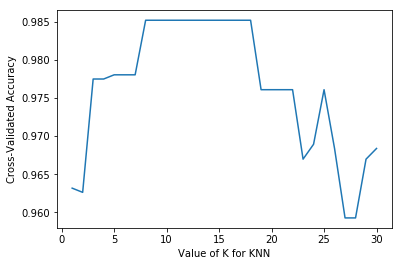

In [5]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

Como siempre, observamos que la performance cambia para distintos valores del hiperparámetro. <br />
¿Cómo podemos hacer para sistematizar esta búsqueda y sumar más hiperparámetros a la exploración? 

## 2. Usando `GridSearch`


In [6]:
from sklearn.model_selection import GridSearchCV

Se define una lista de parámetros a testear.

In [7]:
k_range = list(range(1, 31))
knn = KNeighborsClassifier(n_neighbors=8)

In [8]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


Instanciamos el método `GridSearchCV`

In [9]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

Hacemos el fit

In [10]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

`GridSeachCV` devuelve un dict con mucha información. Desde el tiempo de fiteo de cada parámetro hasta los scores promedio (vía validación cruzada). También provee los score en cada train y test set de la K-Fold Cross Validation. 

In [11]:
grid.cv_results_.keys()

dict_keys(['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params'])

In [12]:
pd.DataFrame(grid.cv_results_).columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_n_neighbors', 'params', 'rank_test_score',
       'split0_test_score', 'split0_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [13]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000524,0.000808,0.958333,1.000000,1,{'n_neighbors': 1},27,0.857143,1.000000,0.928571,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000552,0.000345,0.050221,0.000000
1,0.000341,0.000622,0.958333,0.975040,2,{'n_neighbors': 2},27,0.928571,0.981132,0.928571,...,1.000000,0.972477,1.000000,0.972477,1.0,0.972477,0.000014,0.000010,0.051570,0.004030
2,0.000345,0.000633,0.975000,0.976918,3,{'n_neighbors': 3},12,1.000000,0.981132,0.928571,...,1.000000,0.972477,1.000000,0.972477,1.0,0.972477,0.000018,0.000021,0.035388,0.006008
3,0.000343,0.000636,0.975000,0.976918,4,{'n_neighbors': 4},12,1.000000,0.981132,0.928571,...,1.000000,0.972477,1.000000,0.972477,1.0,0.972477,0.000012,0.000016,0.035388,0.006008
4,0.000343,0.000639,0.975000,0.981496,5,{'n_neighbors': 5},12,0.928571,0.981132,0.928571,...,1.000000,0.981651,1.000000,0.972477,1.0,0.981651,0.000013,0.000015,0.034735,0.004070
5,0.000337,0.000634,0.975000,0.982439,6,{'n_neighbors': 6},12,0.928571,0.981132,0.928571,...,1.000000,0.981651,1.000000,0.972477,1.0,0.981651,0.000011,0.000030,0.034735,0.004887
6,0.000339,0.000654,0.975000,0.978753,7,{'n_neighbors': 7},12,0.928571,0.981132,0.928571,...,1.000000,0.972477,1.000000,0.972477,1.0,0.972477,0.000014,0.000039,0.034735,0.005767
7,0.000353,0.000817,0.983333,0.983357,8,{'n_neighbors': 8},1,1.000000,0.981132,0.928571,...,1.000000,0.981651,1.000000,0.981651,1.0,0.981651,0.000023,0.000480,0.030959,0.003631
8,0.000351,0.000653,0.983333,0.983357,9,{'n_neighbors': 9},1,1.000000,0.981132,0.928571,...,1.000000,0.981651,1.000000,0.981651,1.0,0.981651,0.000024,0.000024,0.030959,0.003631
9,0.000338,0.000649,0.983333,0.983357,10,{'n_neighbors': 10},1,1.000000,0.981132,0.928571,...,1.000000,0.981651,1.000000,0.981651,1.0,0.981651,0.000010,0.000018,0.030959,0.003631


Veamos el mejor modelo:

In [14]:
grid.best_estimator_, grid.best_score_, grid.best_params_

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=8, p=2,
            weights='uniform'), 0.98333333333333328, {'n_neighbors': 8})

### 2.1 Agregando otros parámetros para tunear

Vamos a agregar el parámetro binario de Peso del algoritmo knn que determina si algunos vecinos tendrán mayor ponderación que otros a la hora de clasificar. El valor distance indica que el peso es inversamente proporcional a la distancia

GridSearchCV exige que la grilla de parámetros a explorar venga en un diccionario con los nombres de los parámetros y la lista de los posibles valores. 

Noten que GridSearchCV tiene todos los métodos que la API de sklearn ofrece para modelos predictivos: fit, predict, predict_proba, etc.

In [15]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

Entonces, ahora el tunning se realizará iterando y alternando `weights` y `k` (nro. de vecinos cercanos).

In [16]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


**Check:** 
    1. ¿Cómo se realizará el proceso de búsqueda? 
    2. ¿Cuántas veces tendrá que iterar el algoritmo?

Ajustamos los modelos

In [17]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [18]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000517,0.000613,0.958333,1.000000,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",55,0.857143,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000518,0.000047,0.050221,0.000000
1,0.000325,0.000634,0.958333,1.000000,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",55,0.857143,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000018,0.000028,0.050221,0.000000
2,0.000331,0.000613,0.958333,0.975040,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",55,0.928571,0.981132,...,1.000000,0.972477,1.000000,0.972477,1.0,0.972477,0.000015,0.000019,0.051570,0.004030
3,0.000325,0.000636,0.958333,1.000000,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",55,0.857143,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000013,0.000015,0.050221,0.000000
4,0.000331,0.000613,0.975000,0.976918,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",34,1.000000,0.981132,...,1.000000,0.972477,1.000000,0.972477,1.0,0.972477,0.000011,0.000024,0.035388,0.006008
5,0.000333,0.000639,0.975000,1.000000,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",34,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000011,0.000018,0.035388,0.000000
6,0.000332,0.000613,0.975000,0.976918,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",34,1.000000,0.981132,...,1.000000,0.972477,1.000000,0.972477,1.0,0.972477,0.000011,0.000014,0.035388,0.006008
7,0.000333,0.000643,0.966667,1.000000,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",49,0.928571,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000011,0.000017,0.036897,0.000000
8,0.000329,0.000606,0.975000,0.981496,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",34,0.928571,0.981132,...,1.000000,0.981651,1.000000,0.972477,1.0,0.981651,0.000008,0.000008,0.034735,0.004070
9,0.000328,0.000642,0.975000,1.000000,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",34,0.928571,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000014,0.000023,0.034735,0.000000


Escogemos el mejor modelo

In [19]:
print (grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')
0.983333333333
{'n_neighbors': 8, 'weights': 'uniform'}


## 3. Usamos los mejores parametros para correr las predicciones

In [20]:
knn = KNeighborsClassifier(n_neighbors=8, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_pred), confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      0.81      0.90        16
          2       0.67      1.00      0.80         6

avg / total       0.93      0.90      0.90        30
 [[ 8  0  0]
 [ 0 13  3]
 [ 0  0  6]]


Podemos usar el atajo que tiene `GridSeachCV`: usando el método `predict` sobre objeto `grid`. 

In [22]:
grid.predict(X_test)

array([2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 0,
       0, 2, 0, 0, 1, 2, 0])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


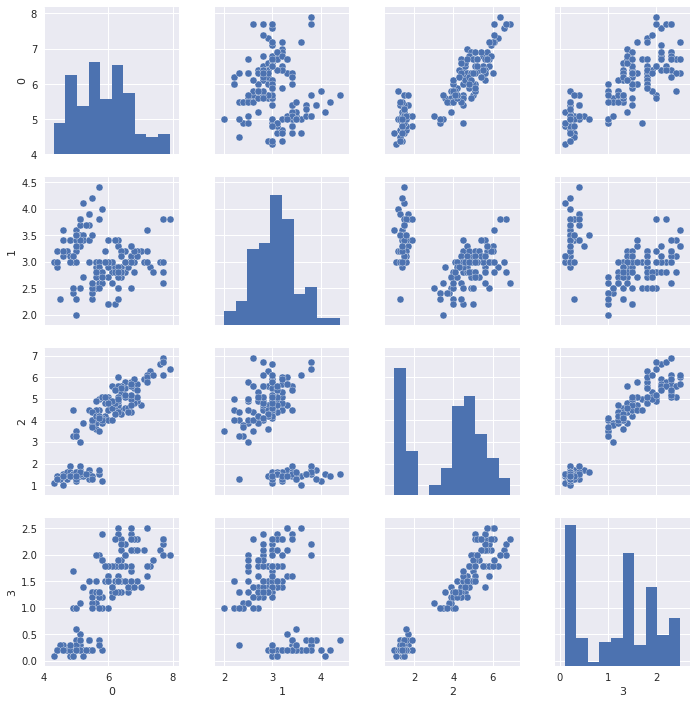

In [23]:
import seaborn as sns
sns.pairplot(pd.DataFrame(X,y))